[Text(0.5, 1.0, 'Соотношение лояльных и ушедших клиентов')]

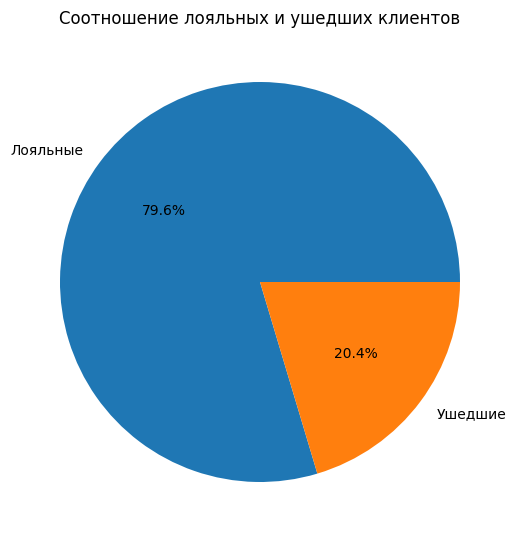

In [3]:
#9.1
import pandas as pd
churn = pd.read_csv("churn.csv",sep=",")
churn['Exited'] = churn['Exited'].apply(lambda x: 'Лояльные' if x==0 else 'Ушедшие')
a =  churn['Exited'].value_counts()
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(a, labels = a.index,
    autopct='%.1f%%')
axes.set(title='Соотношение лояльных и ушедших клиентов')





## Выводы:
Из произведенных вычислений следует, что соотношение ушедших клиентов к лояльным составляет 20 к 80 процентам от общего числа клиентов или 1 к 4, что показывает данная круговая диаграмма. То есть каждый пятый клиент банка уходит.

Максимальный баланс клиента  250898.09 долларов
Средний размер клиентского баланса 119839.69 долларов


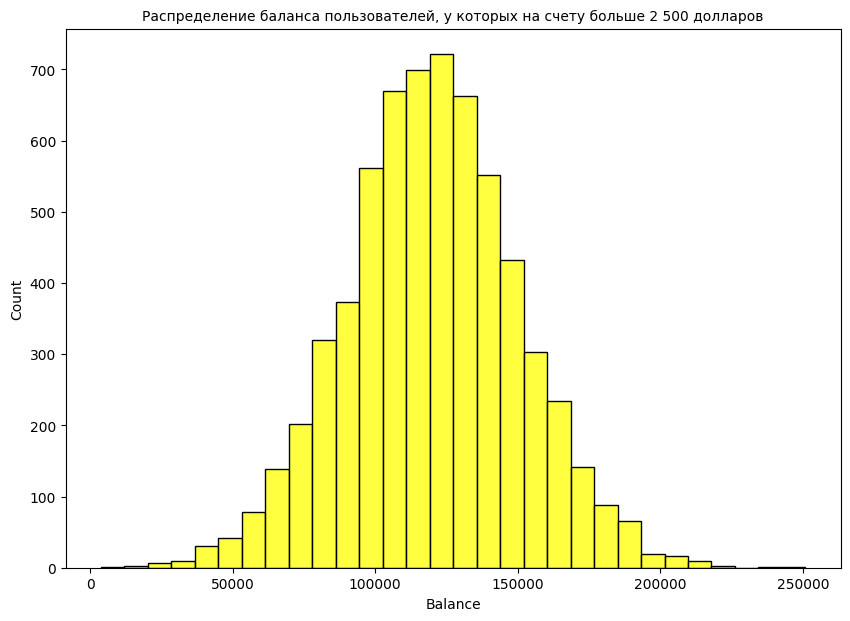

In [4]:
#9.2
import seaborn as sns
hist_data = churn[churn['Balance'] > 2500]
fig = plt.figure(figsize=(10, 7))
hist = sns.histplot(data=hist_data,x='Balance', bins=30, color = 'yellow')
hist.set_title('Распределение баланса пользователей, у которых на счету больше 2 500 долларов', fontsize=10)
print('Максимальный баланс клиента ', hist_data['Balance'].max(), 'долларов')
print('Средний размер клиентского баланса', hist_data['Balance'].median(), 'долларов')




Основное количество вкладчиков имеют балансы от 100 до 140 тысяч долларов, это составляет основу клиентов банка. Распределение за границами меньше 100 и больше 150 тысяч идет вниз довольно резко и тянется экспоненциально, что означает существенное снижение количества вкладчиков с суммами меньше 100 и больше 150 тысяч. На графике есть отметка возле суммы 250000, вероятно это единичный случай, возможно один или несколько клиентов. 

Text(0.5, 1.0, 'Распределение баланса клиента в разрезе признака оттока')

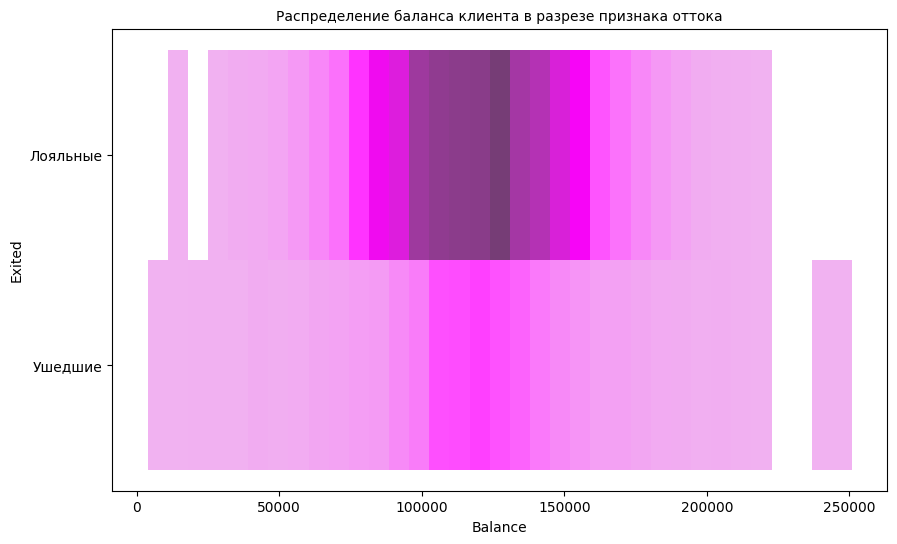

In [5]:
#9.3
fig = plt.figure(figsize=(10, 6))
hist1 = sns.histplot(data=hist_data,x='Balance', y= 'Exited',bins=35, color = 'purple')
hist1.set_title('Распределение баланса клиента в разрезе признака оттока', fontsize=10)

Основная масса ушедших клиентов имела на балансе сумму от 100000 до 125000 долларов, при этом количество лояльных клиентов с балансом больше 125 тысяч резко выделяется в сторону увеличения. Возможно , у банка есть какие-то специальные условия по статусу клиента для баланса размером от 125000, которые повышают привлекательность этого банка в глазах клиента, а зона 100-125 тысяч самая рискованная с точки зрения оттока клиентов. Возможно, в данном балансовом диапазоне у банка недостаточно привлекательные условия обслуживания в сравнении с другими банками, и клиенты, обладающие такой суммой и "не дотягивающие до 125 тысяч", предпочитают переходить в другие банки. 

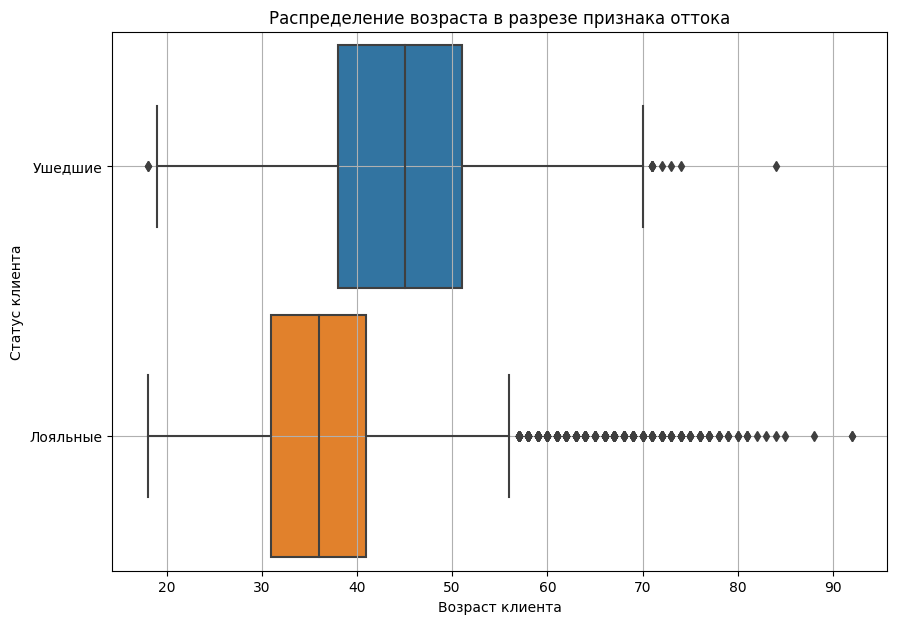

In [6]:
#9.4
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение возраста в разрезе признака оттока');
boxplot.set_xlabel('Возраст клиента');
boxplot.set_ylabel('Статус клиента');
boxplot.grid()


Для группы лояльных клиентов банка длина ящика с усами лежит в границах от 18 до 56 лет, а для ушедших возраст клиента колеблется от 19 до 70 лет. Причём медианный возраст ушедших составляет 46 лет, основу ушедших составляют клиенты возрастом от 37 до 51 года.  Медианный возраст лояльных клиентов 36 лет, а межквартильный размах у них довольно узкий и равен промежутку от 31 до 41 года.

Возраст лояльных на границе за 50% квантилью соответствует возрасту ушедших 25% квантили и составляет 37 лет. Значит, клиенты в возрасте  37-51 лет - вероятнее всего, склонны к наибольшей активности по смене банков или неудовлетворенности работой банка, на них следует обратить внимание.

В группе ушедших клиентов выбросов мало, а в группе лояльных клиентов количество выбросов довольно велико. Данный факт может говорить о том, что возраст лояльных не ограничивается 56 годами, есть клиенты старше и есть совсем почтенного возраста за 90 лет, но их мало. Этот факт говорит о том, что после 57 лет люди уже не так активно вкладывают деньги , но и почти не меняют банки.
   


Text(0, 0.5, 'Средняя зарплата')

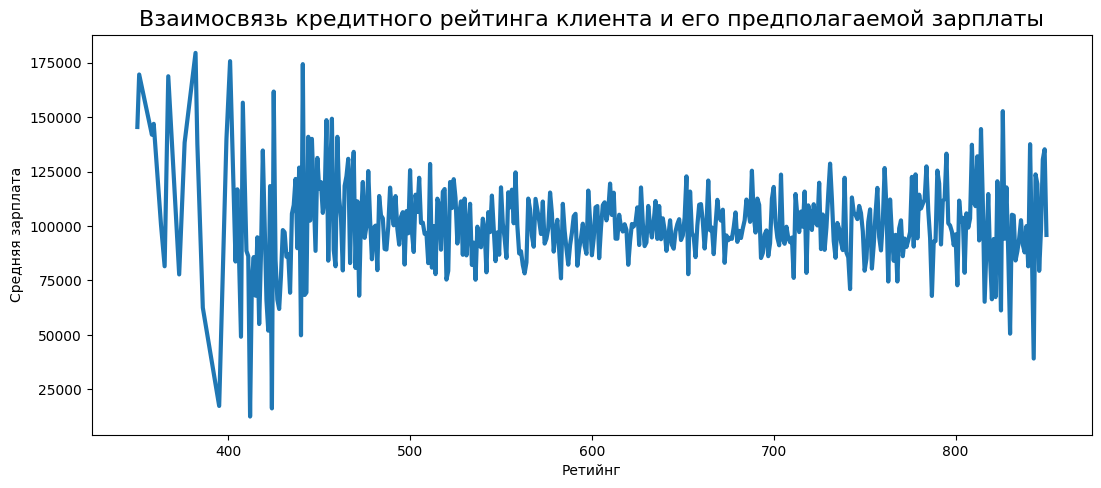

In [7]:
#9.5
import plotly
import plotly.express as px
fig = px.scatter(
    data_frame=churn, 
    x='EstimatedSalary', 
    y='CreditScore',
    color = 'Exited',
    height=800, 
    width=1000, 
    title='Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты' 
)
fig.show()
a = churn.groupby('CreditScore')['EstimatedSalary'].mean()
fig1 = plt.figure(figsize=(10, 4))
axes = fig1.add_axes([0, 0, 1, 1])
axes.plot(a, label='Общее число зафиксированных случаев', lw=3)
axes.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', fontsize=16)
axes.set_xlabel('Ретийнг')
axes.set_ylabel('Средняя зарплата')


Из проведеного анализа взаимосвязи кредитного рейтинга и зарплаты клиенты сложно сделать какие-либо однозначные выводы. Разброс на графике показывает, что при любом кредитном рейтинге есть значения как с более низкой зарплатой, так и с кратно более высокой.
При анализе рейтинга в зависимости от средней зарплаты по рейтингу видим, что значения средней зарплаты скачут сильно при рейтинге до 450 баллов, разброс от 25 до 175 тысяч. Далее, при рейтинге от 450 баллов и выше, средняя зарплата так же имеет разброс, но уже не такой сильный - в районе от 75 до 130 тысяч.

[Text(0.5, 1.0, 'Соотношение полов ушедших клиентов')]

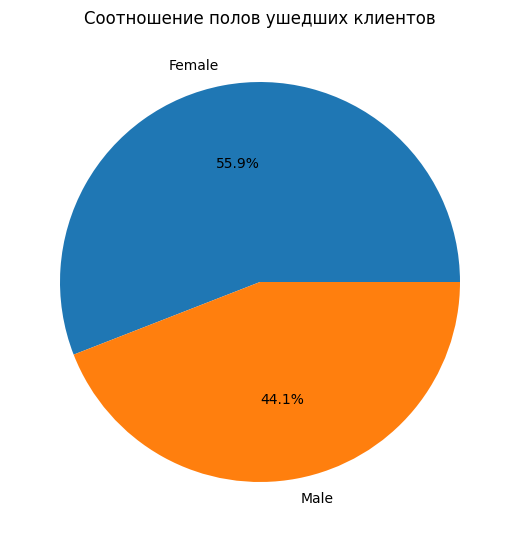

In [8]:
#9.6
left = churn[churn['Exited'] == 'Ушедшие']['Gender'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(left, labels = left.index,
    autopct='%.1f%%')
axes.set(title='Соотношение полов ушедших клиентов')

Женщины уходят чаще, чем мужчины. Соотношение составляет 56 к 44. 

In [13]:
#9.7 
churn_exited = churn.groupby('Exited')['NumOfProducts'].value_counts()
a =pd.DataFrame(churn_exited)
a.rename(columns={'NumOfProducts': 'Value'}, inplace=True)
a =a.reset_index(level=[0,1])
display(a)





,Exited,NumOfProducts,Value
0,Лояльные,2,4242
1,Лояльные,1,3675
2,Лояльные,3,46
3,Ушедшие,1,1409
4,Ушедшие,2,348
5,Ушедшие,3,220
6,Ушедшие,4,60


### Из исследования можно сделать несколько выводов:
1) Среди ушедших клиентов есть 60 человек с 4 приобретенными услугами, в то время как среди оставшихся таких клиентов нет. Значит, если клиент приобретает 4 услуги, он точно уходит. 
2) Количество клиентов с тремя приобретенными услугами в группе лояльных так же не велико, таких всего 46 человек, а среди ушедших их 420! Это так же зона риска, тк из общего числа тех, кто приобрел три услуги (46+420=466), 90% уходят (420/466*100%). 
3) Среди оставшихся клиентов лидирует группа с двумя услугами, среди ушедших лидирует группа с 1 приобретенной услугой, значит покупка 2 услуг - наиболее удобный для клиента вариант, рекомендую отделу продаж банка всем клиентам с 1 услугой продать еще одну. 

IsActiveMember
0    1302
1     735
Name: Exited, dtype: int64

IsActiveMember
0    3547
1    4416
Name: Exited, dtype: int64

64 процентa ушедших клиентов не имели статуса активного клиента
45 процентов лояльных клиентов не имеют статуса активного клиента


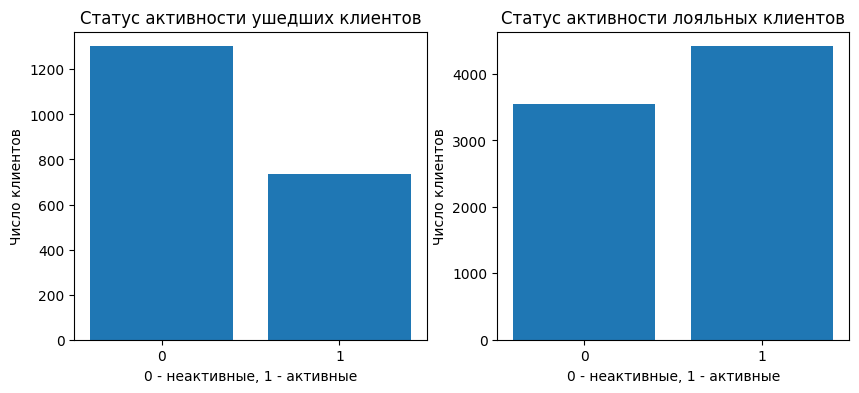

In [8]:
#9.8
churn['IsActiveMember'] = churn['IsActiveMember'].astype('string')
a =(churn[churn['Exited']== 'Ушедшие'].groupby('IsActiveMember')['Exited'].count())
b =(churn[churn['Exited']== 'Лояльные'].groupby('IsActiveMember')['Exited'].count())
display(a,b)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].bar(
    x=a.index,
    height=a)
axes[0].set_title("Статус активности ушедших клиентов")
axes[0].set_xlabel('0 - неактивные, 1 - активные')
axes[0].set_ylabel('Число клиентов')
axes[1].bar(
    x=b.index,
    height=b)
axes[1].set_title("Статус активности лояльных клиентов")
axes[1].set_xlabel('0 - неактивные, 1 - активные')
axes[1].set_ylabel('Число клиентов')

print(round(1302/(1302+735)*100), 'процентa ушедших клиентов не имели статуса активного клиента')
print(round(3547/(4416+3547)*100), 'процентов лояльных клиентов не имеют статуса активного клиента')





Из проведенного анализа видно, что две трети ушедших клиентов не имели статуса активного клиента, в то время как среди лояльных клиентов статус неактивного имеет чуть меньше половины, их 45%. Можно сделать вывод, что имеет смысл предложить "активироваться" оставшимся лояльным клиентам без такого статуса, тк это понизит риск их ухода.

,Все клиенты,Лояльные,Ушедшие,Доля ушедших
Geography,,,,
France,5014,4204,810,0.16
Germany,2509,1695,814,0.32
Spain,2477,2064,413,0.17


Text(0.5, 1.0, 'Распределение всех клиентов по странам')

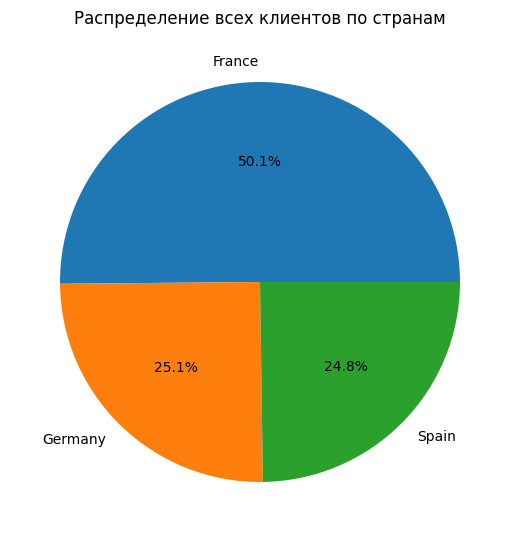

In [38]:
#9.9

df= pd.DataFrame()
df['Все клиенты'] = churn.groupby('Geography')['Exited'].count()
df['Лояльные'] = churn[churn['Exited']== 'Лояльные'].groupby('Geography')['Exited'].count()
df['Ушедшие'] = churn[churn['Exited']== 'Ушедшие'].groupby('Geography')['Exited'].count()
df['Доля ушедших'] = round(df['Ушедшие']/df['Все клиенты'],2)
display(df)
fig = px.choropleth(
    data_frame=df, 
    locations=df.index,
    locationmode = "country names", 
    color='Доля ушедших', 
    title='Доля ушедших по странам', 
    width=800, 
    height=500, 
    color_continuous_scale='Reds' 
)
fig.show()

fig1 = plt.figure(figsize=(5, 5))
axes = fig1.add_axes([0, 0, 1, 1])
axes.pie(
    df['Все клиенты'],
    labels=df.index,
    autopct='%.1f%%')
axes.set_title("Распределение всех клиентов по странам")

Анализ количества ушедших клиентов относительно каждой страны показал, что наибольший процент ушедших относительно всех клиентов страны оказался в Германии и составлят 32%. То есть каждый третий клиент германского филиала банка уходит. 
В Испании и Франции количество ушедших клиентов составляет 17 и 16 процентов соответственно от всей группы клиентов каждой из этих стран, что значительно меньше, чем в Германии. 
Половина всех клиентов банка находится во Франции. Возможно, банк французский и французы ему больше доверяют, у испанцев может нет большой конкуренции среди банков и сами испанцы могут быть менее активны в смене банков на "более выгодные". А в Германии может быть большая конкуренция среди банков и, возможно, много интересных предложений постоянно появляется, поэтому активные и педантичные немцы склонны чаще менять банки в поисках наиболее выгодных условий.

/var/folders/14/1__fhwjd58lctkg45k050nx40000gn/T/ipykernel_661/1227798114.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,11,20,14,17,12,21,21,12,20,26,13
Fair,20,47,49,50,43,48,52,45,51,42,23
Good,32,79,74,76,72,83,64,71,55,73,36
Poor,24,69,54,52,59,47,43,36,53,58,20
Very_Poor,8,17,10,18,17,10,16,13,18,14,9


Text(0.5, 1.0, 'Ушедшие пользователи в разрезе рейтинга и количества лет с банком')

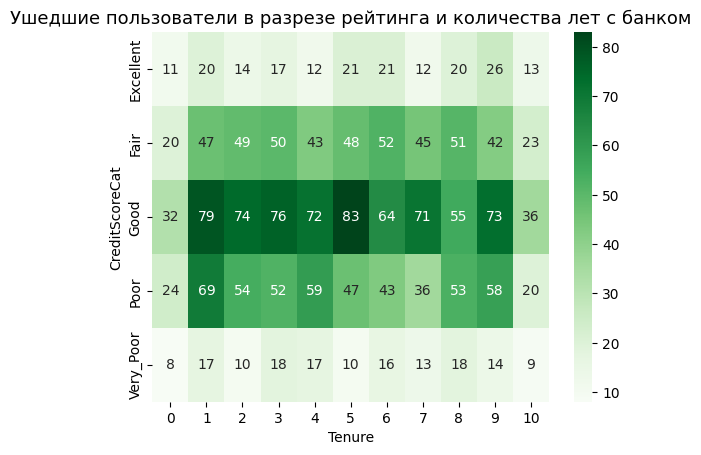

In [65]:
#9.10
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn['CreditScoreCat'] = churn['CreditScore'].apply(get_credit_score_cat)
churn_left = churn[churn['Exited']=='Ушедшие']
churn_left['Exited']= churn_left['Exited'].apply(lambda x: 1)
pivot = churn_left.pivot_table(values='Exited', index='CreditScoreCat', columns='Tenure', aggfunc = 'sum')
display(pivot)
heatmap = sns.heatmap(data=pivot, cmap='Greens', annot=True)
heatmap.set_title('Ушедшие пользователи в разрезе рейтинга и количества лет с банком', fontsize=13)


Из данного исследования видно, что наиболее активно уходят клиенты с кредитным статусом 'good' с практически любым количеством лет в банке (кроме 10 и 0). 
Так же довольно много уходящих с соседним снизу статусом 'poor', пользующихся услугами банка разное количество лет. На третьем месте соседний сверху от 'good' кредитный рейтинг 'fair'. 
Среди клиентов со статусами 'very_poor' и 'excellent' уходящих в разы меньше.
 